### This is a Jupyter notebook to analyze EMC data set - Moving Pictures Tutorial
## 09282022

#### These links might be useful for Qiime2 Jupyter Usage
[Artifact API](https://docs.qiime2.org/2022.8/interfaces/artifact-api/)

[HPC custom Kernel](https://public.confluence.arizona.edu/display/UAHPC/Using+and+Installing+Python)


Image showing the bacterial mechanisms of homeostasis and cancer progression and development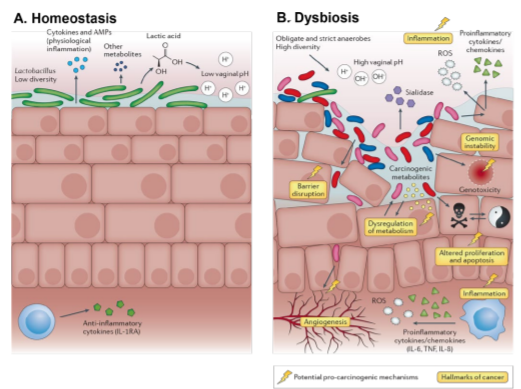

In [5]:
from qiime2.plugins import feature_table
from qiime2 import Artifact
unrarefied_table = Artifact.load('../EMC_04062022/Vaginal_data/vtable-with-p-level7.qza')
rarefy_result = feature_table.methods.rarefy(table=unrarefied_table, sampling_depth=100)
rarefied_table = rarefy_result.rarefied_table

In [ ]:
import biom
biom_table = rarefied_table.view(biom.Table)
print(biom_table.head())

In [ ]:
import pandas as pd
df = rarefied_table.view(pd.DataFrame)
df.head()

In [ ]:
imported_artifact = Artifact.import_data("FeatureTable[Frequency]", df)

In [ ]:
from qiime2.plugins import diversity
alpha_result = diversity.pipelines.alpha(table=rarefied_table, metric='observed_features')
alpha_diversity = alpha_result.alpha_diversity
alpha_diversity.view(pd.Series)

In [ ]:
rarefied_table.save('rare.qza')
alpha_diversity.save('obs_features.qza')
exit

In [ ]:
from qiime2 import Metadata
metadata = Metadata.load('sample-metadata.tsv')
group_significance = diversity.actions.alpha_group_significance(alpha_diversity=alpha_diversity, metadata=metadata)